In [15]:
import numpy as np
import scipy as sp
from scipy.spatial.distance import euclidean as euclidean_dist
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

#Question 1
We wish to cluster the following set of points: 

In [16]:
from IPython.display import Image
Image(url='https://d396qusza40orc.cloudfront.net/mmds/images/otc_gold.gif')

 into 10 clusters. We initially choose each of the green points (25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), and (55,20) as a centroid. Assign each of the gold points to their nearest centroid. (Note: the scales of the horizontal and vertical axes differ, so you really need to apply the formula for distance of points; you can't just "eyeball" it.) Then, recompute the centroids of each of the clusters. Do any of the points then get reassigned to a new cluster on the next round? Identify the true statement in the list below. Each statement refers either to a centroid AFTER recomputation of centroids (precise to one decimal place) or to a point that gets reclassified.
* There is a centroid after recomputation at (56,70.3)
* There is a centroid after recomputation at (50.3,116.3)
* There is a centroid after recomputation at (34.3,133.3)
* There is a centroid after recomputation at (55,20)


In [17]:
points = np.array([(25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), (55,20),
          (50,30), (50,60), (28,145), (65,140), (50,130), (38,115), (55,118), (50,90), (43,83), (63,88)])
centroid_0 = np.array([(25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), (55,20)])

In [18]:
def euclid_dist(point):    
    return np.sqrt(np.sum(point**2))

In [19]:
centroid = centroid_0
dist_func = np.vectorize(euclidean_dist)
def iter_clust(points, centroid):
    data_dist = []
    clusters = defaultdict(list)
    for i in range(points.shape[0]):
        data_dist.append(dist_func(points[i], centroid))
    data_dist=np.array(data_dist)
    data_dist = np.apply_along_axis(euclid_dist, 2, data_dist) # distance each point to each centroid
    for i in range(points.shape[0]):
        clusters[np.argmin(data_dist[i])].append(points[i])
    
    centroid_new = {}
    for i in range(centroid.shape[0]):
        centroid_new[i] = np.mean(clusters[i], axis=0)
    return centroid_new

In [20]:
centroid_1_iter = iter_clust(points, centroid)
print('Centroid after 1 iteration:',centroid_1_iter)

Centroid after 1 iteration: {0: array([  34.33333333,  133.33333333]), 1: array([  52.5       ,  109.33333333]), 2: array([ 36.,  90.]), 3: array([ 35.,  63.]), 4: array([ 52.5,  61.5]), 5: array([ 42.,  57.]), 6: array([ 23.,  40.]), 7: array([ 64.,  37.]), 8: array([ 33.,  22.]), 9: array([ 52.5,  25. ])}


#Question 2
When performing a k-means clustering, success depends very much on the initially chosen points. Suppose that we choose two centroids (a,b) = (5,10) and (c,d) = (20,5), and the data truly belongs to two rectangular clusters, as suggested by the following diagram: 

In [21]:
Image(url='https://d396qusza40orc.cloudfront.net/mmds/images/otc_sq-clust.gif')

 Under what circumstances will the initial clustering be successful? That is, under what conditions will all the yellow points be assigned to the centroid (5,10), while all of the blue points are assigned to cluster (20,5))? Identify in the list below, a pair of rectangles (described by their upper left corner, UL, and their lower-right corner LR) that are successfully clustered.
* Yellow: UL=(6,7) and LR=(11,4); Blue: UL=(11,5) and LR=(17,2)
* Yellow: UL=(3,3) and LR=(10,1); Blue: UL=(13,10) and LR=(16,4)
* Yellow: UL=(3,3) and LR=(10,1); Blue: UL=(15,14) and LR=(20,10)
* Yellow: UL=(7,8) and LR=(12,5); Blue: UL=(13,10) and LR=(16,4)


In [42]:
centroids = np.array([(5,10), (20,5)])
def plot_pic(Yellow, Blue):
    plt.plot(centroids[0,0],centroids[0,1], 'yo')
    plt.plot(centroids[1,0],centroids[1,1], 'bo')
    plt.axes().set_xlim(0,25)
    plt.axes().set_ylim(0,25)
    plt.gca().add_patch(Rectangle((Yellow[0][0],Yellow[1][1]),Yellow[1][0]-Yellow[0][0],Yellow[0][1]-Yellow[1][1], facecolor='yellow'))
    plt.gca().add_patch(Rectangle((Blue[0][0],Blue[1][1]),Blue[1][0]-Blue[0][0],Blue[0][1]-Blue[1][1], facecolor='blue'))
def plot_perpendicular_bisector(centroids):
    midpoint = ((centroids[0][0]+centroids[1][0])/2,  (centroids[0][1]+centroids[1][1])/2)
    print(midpoint)
    slope = ((centroids[1][1]-centroids[0][1])/(centroids[1][0]-centroids[0][0]))
    slope_perp = -1/slope
    b = midpoint[1] - slope_perp * midpoint[0]
    plt.plot(np.linspace(0,25,1000), np.linspace(0,25,1000) * slope_perp + b, 'r')
    

(12.5, 7.5)


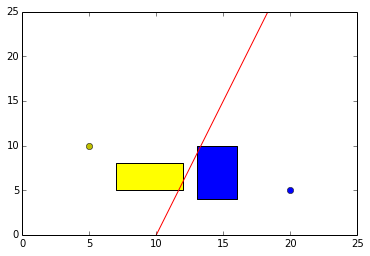

In [45]:
Yellow1 = ((7,8), (12,5))
Blue1 = ((13,10), (16,4))
plot_perpendicular_bisector(centroids)
plot_pic(Yellow1, Blue1)

(12.5, 7.5)


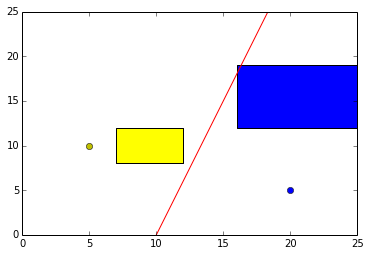

In [46]:
Yellow2 = ((7,12),(12,8))
Blue2 = ((16,19), (25,12))
plot_perpendicular_bisector(centroids)
plot_pic(Yellow2, Blue2)

(12.5, 7.5)


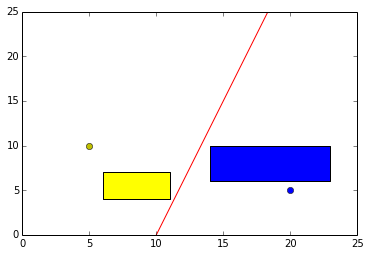

In [47]:
Yellow3 = ((6,7),(11,4))
Blue3 = ((14,10),(23,6) )
plot_perpendicular_bisector(centroids)
plot_pic(Yellow3, Blue3)

(12.5, 7.5)


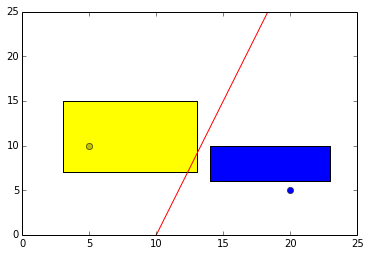

In [48]:
Yellow3 = ((3,15),(13,7))
Blue3 = ((14,10),(23,6) )
plot_perpendicular_bisector(centroids)
plot_pic(Yellow3, Blue3)

#Question 3
Suppose we apply the BALANCE algorithm with bids of 0 or 1 only, to a situation where advertiser A bids on query words x and y, while advertiser B bids on query words x and z. Both have a budget of $2. Identify in the list below a sequence of four queries that will certainly be handled optimally by the algorithm.

* xyxz 			
* xzzz 			
* xxxy 			
* xyzx 	Correct 	1.00 	

Whichever advertiser is assigned the first x, the other will be assigned the second x, thus using all four queries. 

#Question 4
The set cover problem is: given a list of sets, find a smallest collection of these sets such that every element in any of the sets is in at least one set of the collection. As we form a collection, we say an element is covered if it is in at least one set of the collection. Note: In this problem, we shall represent sets by concatenating their elements, without brackets or commas. For example, {A,B} will be represented simply as AB. There are many greedy algorithms that could be used to pick a collection of sets that is close to as small as possible. Here are some that you will consider in this problem. Dumb: Select sets for the collection in the order in which they appear on the list. Stop when all elements are covered. Simple: Consider sets in the order in which they appear on the list. When it is considered, select a set if it has at least one element that is not already covered. Stop when all elements are covered. Largest-First: Consider sets in order of their size. If there are ties, break the tie in favor of the one that appears first on the list. When it is considered, select a set if it has at least one element that is not already covered. Stop when all elements are covered. Most-Help: Consider sets in order of the number of elements they contain that are not already covered. If there are ties, break the tie in favor of the one that appears first on the list. Stop when all elements are covered. Here is a list of sets: AB, BC, CD, DE, EF, FG, GH, AH, ADG, ADF First, determine the optimum solution, that is, the fewest sets that can be selected for a collection that covers all eight elements A,B,...,H. Then, determine the sizes of the collections that will be constructed by each of the four algorithms mentioned above. Compute the ratio of the size returned by the algorithm to the optimum size, and identify one of these ratios in the list below, correct to two decimal places.

Dumb: 2

Largest-First: 1.5

Most-Help: 1.25



#Question 5
This bipartite graph:

In [49]:
Image(url='https://d396qusza40orc.cloudfront.net/mmds/images/otc.gif')

Has several perfect matchings. Find all the perfect matchings and then identify, in the list below, a pair of edges that can appear together in a perfect matching.

a0 - b1

a1 - b3

a2 - b0

a3 - b2

a4 - b4